<font size=3 color='blue'>
    
  # <center>Tarea 1, agosto 23 del 2022</center> 
    
<font size=4 color='purple'>
   <center> Diego González Baños</center>

<font size=3 color='blue'>
    
  # <center>Ajuste del experimento de un riel inclinado con una función</center> 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlkDz7k-mS1zDHiqCWIRyRQzAlyYGx-qIsHQ&usqp=CAU)

<font size=4>En esta tarea vamos a repetir el procedimiento expuesto en clase, con la nueva perspectiva de atacar el problema del plano inclinado.

<font size=2 color='blue'>
    
# Generación de las muestras

<font size=4 >
$$ $$
Se genera un conjunto de $m$ muestras aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_m,y_m)$), las cuales simulan nuestros resultados de medición en el laboratorio de Mecánica

In [534]:
# Importing the python libraries

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# To have a reproducible code we use a random seed 
np.random.seed(3)

In [535]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time # [35.0, 10.0, ...., 99.0]
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2 + error # (1/2 a) t**2+v_0t + x_0 
        
    return x, y


In [536]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100000.0
measure_time = 100.0
speed = 20.0
acelera= 490
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


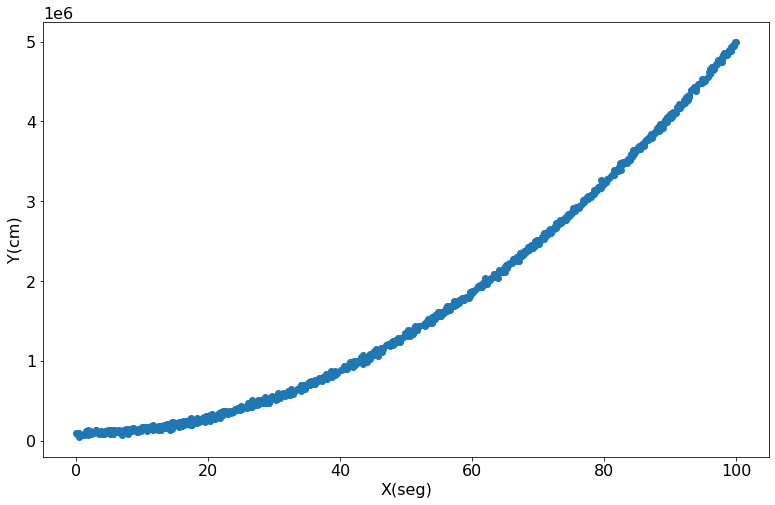

In [537]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=2 color='blue'>

# 1. Buscando la correlación entre las muestras de manera manual:

<font size=4>Para encontrar la correlación entre las muestras, proponemos un conjunto de funciones definidas mediante la siguiente relación *cuadrática*:
    
$$
F(X, W1, W2 , b) = b + W_1 X + W_2 X^2 $$




<font size=4 color='red'> a) Comenzamos por establecer un primer "guess" de los posibles valores que pueden tomar nuestras incógnitas

In [538]:
weight1_0 = 1000.0
weight2_0 = 400.0
bias_0 = 10000.0

<font size=4 color="blue">

Se grafica la correspondiente función $F(X, W1, W2 , b)$, junto con los puntos que representan a las muestras

In [539]:
# Function for plotting (x,y) and (x,y_)

def plot_x_y_y__(x, y, y_, points=True):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting function
    plt.scatter(x, y_, color='green', label='F(X, W, b)')
    plt.legend()

    #Plotting samples
    plt.scatter(x, y)

    plt.show()
    

<font size=4>

Se grafica la correspondiente función f para los valores $x_i$, así como las muestras $(x_i, y_i)$

residuo: 174060616045.66


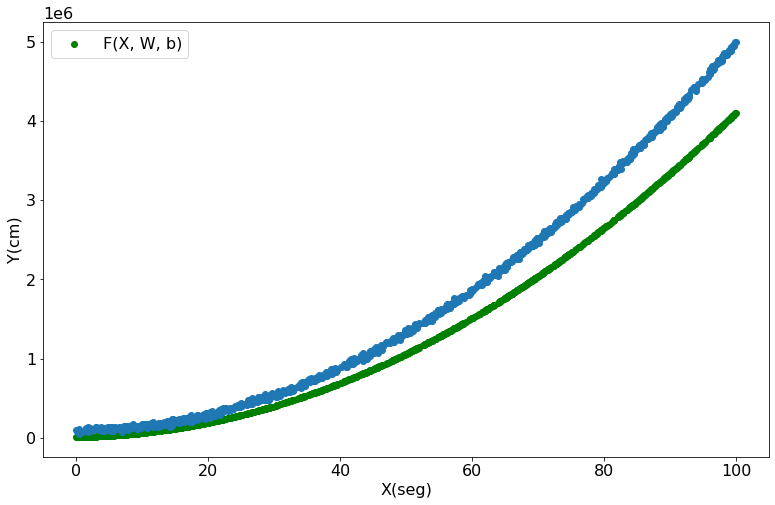

In [540]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)

y_ = weight2_0 *x**2+weight1_0*x + bias_0

# Using the function F, the residuos is calculated by comparing the calculated and measured values

residuo = np.mean((y-y_)**2)

print('residuo: {0:10.2f}'.format( residuo))

plot_x_y_y__(x, y, y_, points=True)


<font size=4 color="blue">

De la gráficas se observa que la función está lejos de describir correctamente la correlación entre los puntos.

Los valores de los pesos  $w_2$, $w_1$,  y el bias  𝑏  se actualizan iterativamente a prueba y error. Para ello

se hacen los cambios de acuerdo a la sugerencia de lo observado en la gráfica.

<font size=4 color=red>

b)Definan una función que actualice los pesos de nuestra función a ajustar, y devuelve dichos argumentos actualizados, así como el arreglo $y_$ y el error cuadrático medio. Pueden tomar de referencia la función `update_weight_biases` del notebook de la clase 2.

In [541]:
def update_weights_biases(x, y, weight1,weight2,bias,delta_w1, delta_w2,delta_bias):
    # actualiza el peso w2
    weight2 = weight2 + delta_w2
    #actualiza el peso w1
    weight1 = weight1 + delta_w1
    # actualiza el bias
    bias = bias + delta_b
    
    #genera el arreglo y_, el cual contendrá las evaluaciones de nuestra función propuesta en los tiempos x
    y_ = weight2 *x**2 + weight1*x + bias
    #calcula el error cuadrático medio
    mse = np.mean((y - y_)**2)
    #regresa el peso w, el bias, el arreglo y_ y el mse
    return weight1, weight2, bias, y_, mse

<font size=4 color=red>
c)Realizar una gráfica, usando la función `update_weights_biases` para calcular la actualización de los pesos y el bias. Puedes proponer cualquier valor para actualizar los parámetros.

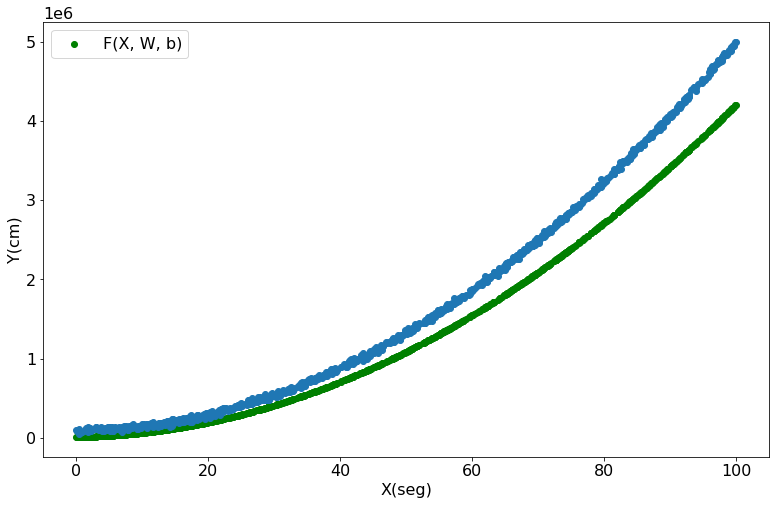

In [542]:
weight1 = weight1_0
weight2 = weight2_0
bias = bias_0
delta_w1 = 0.02
delta_w2 = 10
delta_b = 10.0
weight2,weight1, bias, y_, mse = update_weights_biases(x, y , weight1, weight2 , bias, delta_w1 , delta_w2 , delta_b)
plot_x_y_y__(x, y, y_, points=True) 

<font size=4 color='red'>
d) Ahora, actualiza todos los parámetros de manera iterativa, durante el número de ciclos que consideres adecuados. Puedes comenzar trabajando con una sola variable y dejar fijas las demás, como se propone en el notebook 2 de la clase.

Anexa también la gráfica de costo vs pesos, de modo que puedas escoger los parámetros adecuado en donde se minimiza dicho costo.
    
A continuación te mostrarmos un ejemplo de código, para la variación del peso $w_2$. Tú lo tienes que hacer para encontrar los 3 parámetros.

In [543]:
update_outputs = []

weight1 = weight1_0
weight2 = weight2_0
bias = bias_0
delta_w2 = 10
delta_w1 = 0
delta_b = 0 
iterations = 10000

for i in range(iterations):
    
    weight2, weight1 ,bias, y_, mse = update_weights_biases(x, y , weight1, weight2 ,bias, delta_w1, delta_w2,delta_b)
    
    update_outputs.append([weight2, weight1, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight2: {0:8.2f}    weight1: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight2, weight1, bias, mse))

weight2:  1000.00    weight1:   410.00    bias: 10000.00   MSE: 139060659244.49
weight2:  1050.00    weight1:   460.00    bias: 10000.00   MSE: 23042122315.88
weight2:  1100.00    weight1:   510.00    bias: 10000.00   MSE: 9288718617.22
weight2:  1150.00    weight1:   560.00    bias: 10000.00   MSE: 97800448148.52
weight2:  1200.00    weight1:   610.00    bias: 10000.00   MSE: 288577310909.79
weight2:  1250.00    weight1:   660.00    bias: 10000.00   MSE: 581619306901.01
weight2:  1300.00    weight1:   710.00    bias: 10000.00   MSE: 976926436122.19
weight2:  1350.00    weight1:   760.00    bias: 10000.00   MSE: 1474498698573.34
weight2:  1400.00    weight1:   810.00    bias: 10000.00   MSE: 2074336094254.44
weight2:  1450.00    weight1:   860.00    bias: 10000.00   MSE: 2776438623165.51
weight2:  1500.00    weight1:   910.00    bias: 10000.00   MSE: 3580806285306.53
weight2:  1550.00    weight1:   960.00    bias: 10000.00   MSE: 4487439080677.52
weight2:  1600.00    weight1:  1010.00 

weight2: 15150.00    weight1: 14560.00    bias: 10000.00   MSE: 4047991425983545.50
weight2: 15200.00    weight1: 14610.00    bias: 10000.00   MSE: 4076816440150695.50
weight2: 15250.00    weight1: 14660.00    bias: 10000.00   MSE: 4105743719451075.50
weight2: 15300.00    weight1: 14710.00    bias: 10000.00   MSE: 4134773263884685.50
weight2: 15350.00    weight1: 14760.00    bias: 10000.00   MSE: 4163905073451525.00
weight2: 15400.00    weight1: 14810.00    bias: 10000.00   MSE: 4193139148151595.50
weight2: 15450.00    weight1: 14860.00    bias: 10000.00   MSE: 4222475487984895.50
weight2: 15500.00    weight1: 14910.00    bias: 10000.00   MSE: 4251914092951425.00
weight2: 15550.00    weight1: 14960.00    bias: 10000.00   MSE: 4281454963051185.00
weight2: 15600.00    weight1: 15010.00    bias: 10000.00   MSE: 4311098098284175.50
weight2: 15650.00    weight1: 15060.00    bias: 10000.00   MSE: 4340843498650394.50
weight2: 15700.00    weight1: 15110.00    bias: 10000.00   MSE: 437069116414

weight2: 30050.00    weight1: 29460.00    bias: 10000.00   MSE: 17163384588619702.00
weight2: 30100.00    weight1: 29510.00    bias: 10000.00   MSE: 17222684612489380.00
weight2: 30150.00    weight1: 29560.00    bias: 10000.00   MSE: 17282086901492288.00
weight2: 30200.00    weight1: 29610.00    bias: 10000.00   MSE: 17341591455628428.00
weight2: 30250.00    weight1: 29660.00    bias: 10000.00   MSE: 17401198274897796.00
weight2: 30300.00    weight1: 29710.00    bias: 10000.00   MSE: 17460907359300390.00
weight2: 30350.00    weight1: 29760.00    bias: 10000.00   MSE: 17520718708836222.00
weight2: 30400.00    weight1: 29810.00    bias: 10000.00   MSE: 17580632323505278.00
weight2: 30450.00    weight1: 29860.00    bias: 10000.00   MSE: 17640648203307566.00
weight2: 30500.00    weight1: 29910.00    bias: 10000.00   MSE: 17700766348243084.00
weight2: 30550.00    weight1: 29960.00    bias: 10000.00   MSE: 17760986758311832.00
weight2: 30600.00    weight1: 30010.00    bias: 10000.00   MSE: 1

weight2: 44600.00    weight1: 44010.00    bias: 10000.00   MSE: 38734768831334240.00
weight2: 44650.00    weight1: 44060.00    bias: 10000.00   MSE: 38823828008973832.00
weight2: 44700.00    weight1: 44110.00    bias: 10000.00   MSE: 38912989451746656.00
weight2: 44750.00    weight1: 44160.00    bias: 10000.00   MSE: 39002253159652704.00
weight2: 44800.00    weight1: 44210.00    bias: 10000.00   MSE: 39091619132692008.00
weight2: 44850.00    weight1: 44260.00    bias: 10000.00   MSE: 39181087370864520.00
weight2: 44900.00    weight1: 44310.00    bias: 10000.00   MSE: 39270657874170264.00
weight2: 44950.00    weight1: 44360.00    bias: 10000.00   MSE: 39360330642609232.00
weight2: 45000.00    weight1: 44410.00    bias: 10000.00   MSE: 39450105676181440.00
weight2: 45050.00    weight1: 44460.00    bias: 10000.00   MSE: 39539982974886880.00
weight2: 45100.00    weight1: 44510.00    bias: 10000.00   MSE: 39629962538725536.00
weight2: 45150.00    weight1: 44560.00    bias: 10000.00   MSE: 3

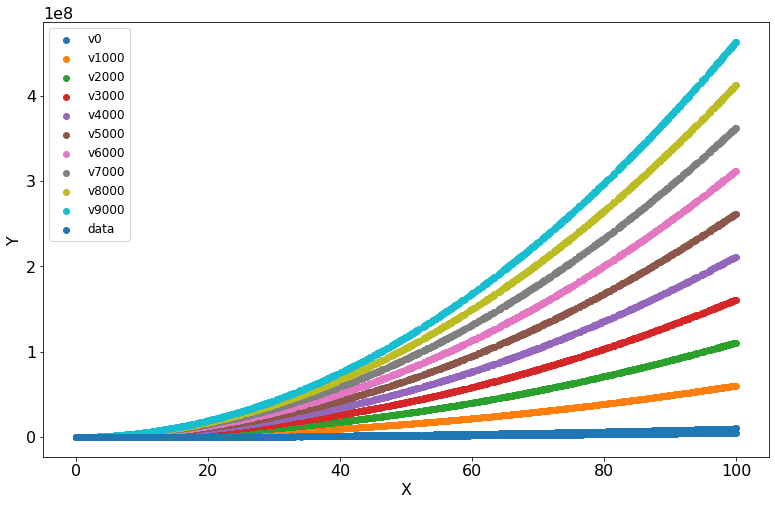

In [544]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,10000,1000):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i))
    plt.legend()

plt.scatter(x, y, label='data')
plt.legend()

plt.show()

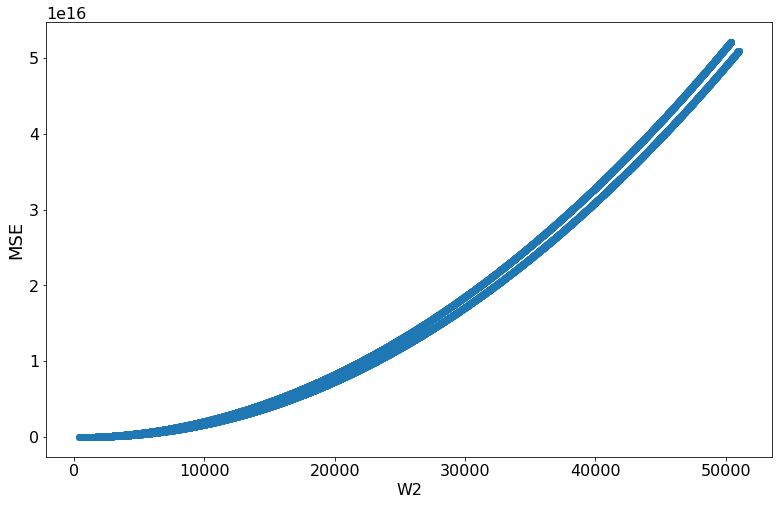

In [545]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W2', fontsize=16)

weights2 = []

mse = []


#update_outputs=[[20,10,0,[F(X;20,10,0)], 25000], [23,10,0, [F(X;23,10,0)], 24000], ...]



for update_output in update_outputs:
    
    weights2.append(update_output[0])
    
    mse.append(update_output[4])
    
plt.scatter(weights2, mse)




plt.show()

In [546]:
index_min = np.argmin(mse)# returns the index for the minimum value in the list
#mse=[25000,24000, ...., 700, 700, 800, ..., 10000000]
#       0     1          321  322, 323, ...,    999

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w2_opt = update_outputs[index_min][0]
w1_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]
print('Los valores optimos de los parámetros son W2 = {0:5.2f}  W1 = {1:5.2f}   b= {2:5.2f} ' \
      .format(w2_opt,w1_opt, b_opt))

El MSE mas pequeño tiene el valor: 2518264109.09
Los valores optimos de los parámetros son W2 = 1080.00  W1 = 490.00   b= 10000.00 


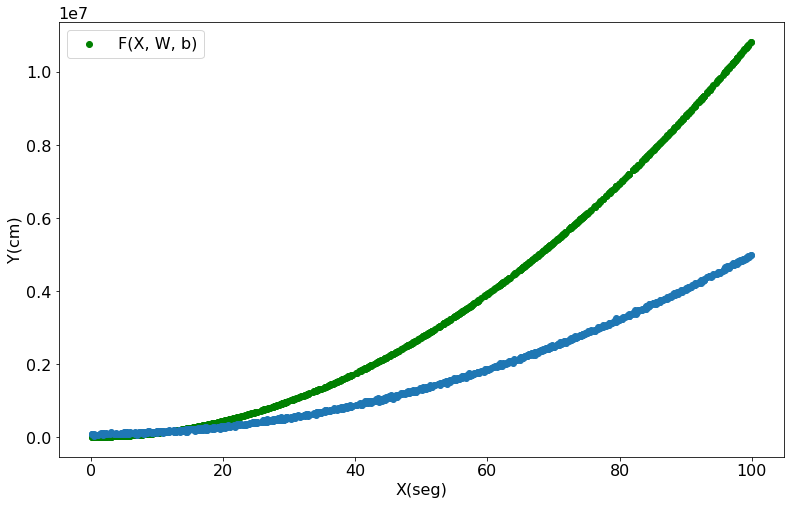

In [547]:
#Gráfica para los parámetros óptimos:

y_ = w2_opt*x**2 + w1_opt*x + b_opt

plot_x_y_y__(x,y,y_,points=True)

<font size=4 color='blue'>
Repetimos el procedimiento para w1

In [548]:
update_outputs = []

weight1 = weight1_0
weight2 = weight2_0
bias = bias_0
delta_w2 = 0
delta_w1 = 10
delta_b = 0 
iterations = 10000

for i in range(iterations):
    
    weight2, weight1 ,bias, y_, mse = update_weights_biases(x, y , weight1, weight2 ,bias, delta_w1, delta_w2,delta_b)
    
    update_outputs.append([weight2, weight1, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight2: {0:8.2f}    weight1: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight2, weight1, bias, mse))

weight2:  1010.00    weight1:   400.00    bias: 10000.00   MSE: 173585720668.22
weight2:  1060.00    weight1:   450.00    bias: 10000.00   MSE: 37621881193.04
weight2:  1110.00    weight1:   500.00    bias: 10000.00   MSE: 3923174947.83
weight2:  1160.00    weight1:   550.00    bias: 10000.00   MSE: 72489601932.58
weight2:  1210.00    weight1:   600.00    bias: 10000.00   MSE: 243321162147.29
weight2:  1260.00    weight1:   650.00    bias: 10000.00   MSE: 516417855591.95
weight2:  1310.00    weight1:   700.00    bias: 10000.00   MSE: 891779682266.58
weight2:  1360.00    weight1:   750.00    bias: 10000.00   MSE: 1369406642171.17
weight2:  1410.00    weight1:   800.00    bias: 10000.00   MSE: 1949298735305.71
weight2:  1460.00    weight1:   850.00    bias: 10000.00   MSE: 2631455961670.22
weight2:  1510.00    weight1:   900.00    bias: 10000.00   MSE: 3415878321264.69
weight2:  1560.00    weight1:   950.00    bias: 10000.00   MSE: 4302565814089.12
weight2:  1610.00    weight1:  1000.00 

weight2: 15210.00    weight1: 14600.00    bias: 10000.00   MSE: 4071186499288897.00
weight2: 15260.00    weight1: 14650.00    bias: 10000.00   MSE: 4100093833286731.00
weight2: 15310.00    weight1: 14700.00    bias: 10000.00   MSE: 4129103432417794.00
weight2: 15360.00    weight1: 14750.00    bias: 10000.00   MSE: 4158215296682087.50
weight2: 15410.00    weight1: 14800.00    bias: 10000.00   MSE: 4187429426079611.00
weight2: 15460.00    weight1: 14850.00    bias: 10000.00   MSE: 4216745820610364.50
weight2: 15510.00    weight1: 14900.00    bias: 10000.00   MSE: 4246164480274347.50
weight2: 15560.00    weight1: 14950.00    bias: 10000.00   MSE: 4275685405071561.00
weight2: 15610.00    weight1: 15000.00    bias: 10000.00   MSE: 4305308595002004.50
weight2: 15660.00    weight1: 15050.00    bias: 10000.00   MSE: 4335034050065677.50
weight2: 15710.00    weight1: 15100.00    bias: 10000.00   MSE: 4364861770262580.00
weight2: 15760.00    weight1: 15150.00    bias: 10000.00   MSE: 439479175559

weight2: 30510.00    weight1: 29900.00    bias: 10000.00   MSE: 17689033144802040.00
weight2: 30560.00    weight1: 29950.00    bias: 10000.00   MSE: 17749233609568240.00
weight2: 30610.00    weight1: 30000.00    bias: 10000.00   MSE: 17809536339467674.00
weight2: 30660.00    weight1: 30050.00    bias: 10000.00   MSE: 17869941334500334.00
weight2: 30710.00    weight1: 30100.00    bias: 10000.00   MSE: 17930448594666226.00
weight2: 30760.00    weight1: 30150.00    bias: 10000.00   MSE: 17991058119965346.00
weight2: 30810.00    weight1: 30200.00    bias: 10000.00   MSE: 18051769910397696.00
weight2: 30860.00    weight1: 30250.00    bias: 10000.00   MSE: 18112583965963280.00
weight2: 30910.00    weight1: 30300.00    bias: 10000.00   MSE: 18173500286662088.00
weight2: 30960.00    weight1: 30350.00    bias: 10000.00   MSE: 18234518872494128.00
weight2: 31010.00    weight1: 30400.00    bias: 10000.00   MSE: 18295639723459400.00
weight2: 31060.00    weight1: 30450.00    bias: 10000.00   MSE: 1

weight2: 45460.00    weight1: 44850.00    bias: 10000.00   MSE: 40244986060424184.00
weight2: 45510.00    weight1: 44900.00    bias: 10000.00   MSE: 40335763800026144.00
weight2: 45560.00    weight1: 44950.00    bias: 10000.00   MSE: 40426643804761336.00
weight2: 45610.00    weight1: 45000.00    bias: 10000.00   MSE: 40517626074629752.00
weight2: 45660.00    weight1: 45050.00    bias: 10000.00   MSE: 40608710609631392.00
weight2: 45710.00    weight1: 45100.00    bias: 10000.00   MSE: 40699897409766288.00
weight2: 45760.00    weight1: 45150.00    bias: 10000.00   MSE: 40791186475034384.00
weight2: 45810.00    weight1: 45200.00    bias: 10000.00   MSE: 40882577805435728.00
weight2: 45860.00    weight1: 45250.00    bias: 10000.00   MSE: 40974071400970304.00
weight2: 45910.00    weight1: 45300.00    bias: 10000.00   MSE: 41065667261638096.00
weight2: 45960.00    weight1: 45350.00    bias: 10000.00   MSE: 41157365387439120.00
weight2: 46010.00    weight1: 45400.00    bias: 10000.00   MSE: 4

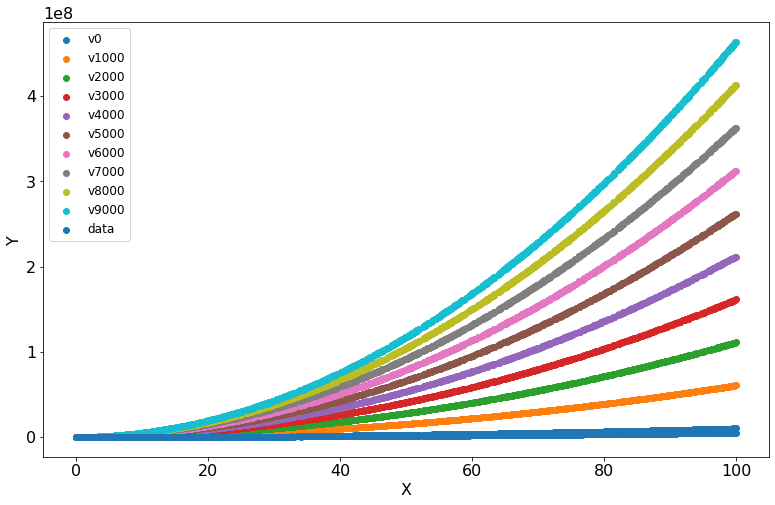

In [549]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,10000,1000):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i))
    plt.legend()

plt.scatter(x, y, label='data')
plt.legend()

plt.show()

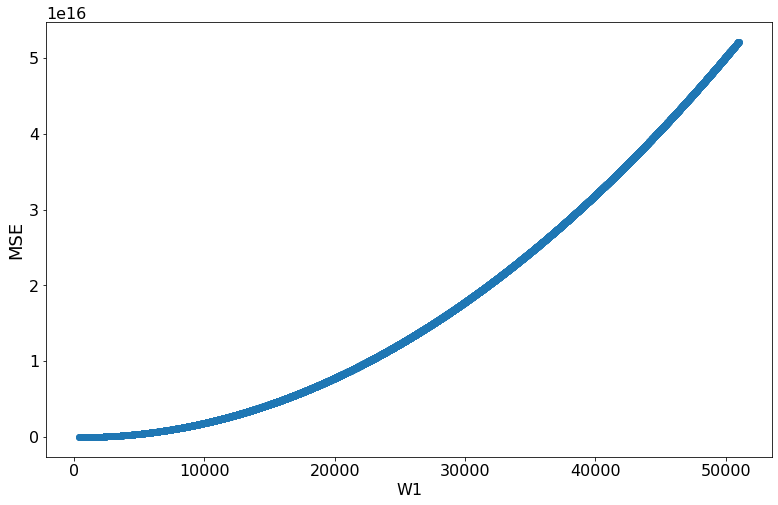

In [550]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W1', fontsize=16)

weights1 = []

mse = []


#update_outputs=[[20,10,0,[F(X;20,10,0)], 25000], [23,10,0, [F(X;23,10,0)], 24000], ...]



for update_output in update_outputs:
    
    weights1.append(update_output[1])
    
    mse.append(update_output[4])
    
plt.scatter(weights1, mse)




plt.show()

In [551]:
index_min = np.argmin(mse)# returns the index for the minimum value in the list
#mse=[25000,24000, ...., 700, 700, 800, ..., 10000000]
#       0     1          321  322, 323, ...,    999

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w2_opt = update_outputs[index_min][0]
w1_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]
print('Los valores optimos de los parámetros son W2 = {0:5.2f}  W1 = {1:5.2f}   b= {2:5.2f} ' \
      .format(w2_opt,w1_opt, b_opt))

El MSE mas pequeño tiene el valor: 2481705538.48
Los valores optimos de los parámetros son W2 = 1100.00  W1 = 490.00   b= 10000.00 


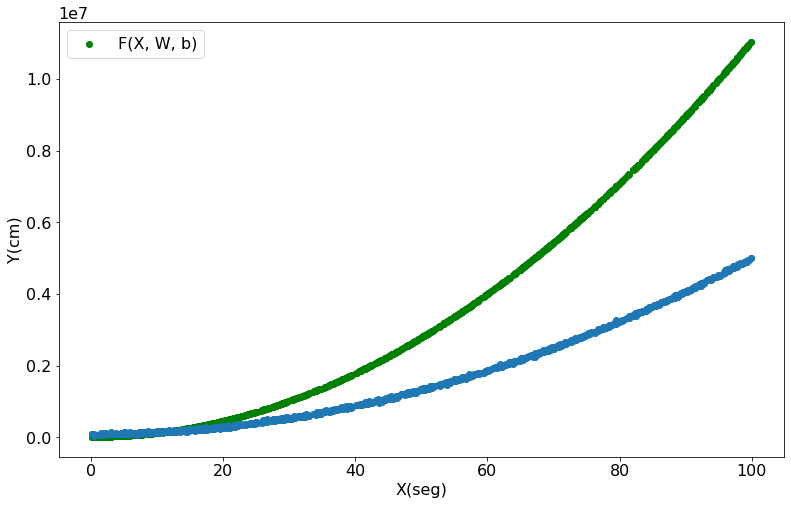

In [552]:
#Gráfica para los parámetros óptimos:

y_ = w2_opt*x**2 + w1_opt*x + b_opt

plot_x_y_y__(x,y,y_,points=True)

<font size=4 color='blue'>
Repetimos el proceso para b

In [553]:
update_outputs = []

weight1 = weight1_0
weight2 = weight2_0
bias = bias_0
delta_w2 = 0
delta_w1 = 0
delta_b = 1000
iterations = 10000

for i in range(iterations):
    
    weight2, weight1 ,bias, y_, mse = update_weights_biases(x, y , weight1, weight2 ,bias, delta_w1, delta_w2,delta_b)
    
    update_outputs.append([weight2, weight1, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight2: {0:8.2f}    weight1: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight2, weight1, bias, mse))

weight2:  1000.00    weight1:   400.00    bias: 11000.00   MSE: 173378925021.62
weight2:  1000.00    weight1:   400.00    bias: 21000.00   MSE: 166672014781.23
weight2:  1000.00    weight1:   400.00    bias: 31000.00   MSE: 160165104540.84
weight2:  1000.00    weight1:   400.00    bias: 41000.00   MSE: 153858194300.45
weight2:  1000.00    weight1:   400.00    bias: 51000.00   MSE: 147751284060.07
weight2:  1000.00    weight1:   400.00    bias: 61000.00   MSE: 141844373819.68
weight2:  1000.00    weight1:   400.00    bias: 71000.00   MSE: 136137463579.29
weight2:  1000.00    weight1:   400.00    bias: 81000.00   MSE: 130630553338.90
weight2:  1000.00    weight1:   400.00    bias: 91000.00   MSE: 125323643098.51
weight2:  1000.00    weight1:   400.00    bias: 101000.00   MSE: 120216732858.13
weight2:  1000.00    weight1:   400.00    bias: 111000.00   MSE: 115309822617.74
weight2:  1000.00    weight1:   400.00    bias: 121000.00   MSE: 110602912377.35
weight2:  1000.00    weight1:   400.0

weight2:  1000.00    weight1:   400.00    bias: 2871000.00   MSE: 6406202596270.70
weight2:  1000.00    weight1:   400.00    bias: 2881000.00   MSE: 6456695686030.31
weight2:  1000.00    weight1:   400.00    bias: 2891000.00   MSE: 6507388775789.93
weight2:  1000.00    weight1:   400.00    bias: 2901000.00   MSE: 6558281865549.54
weight2:  1000.00    weight1:   400.00    bias: 2911000.00   MSE: 6609374955309.15
weight2:  1000.00    weight1:   400.00    bias: 2921000.00   MSE: 6660668045068.76
weight2:  1000.00    weight1:   400.00    bias: 2931000.00   MSE: 6712161134828.38
weight2:  1000.00    weight1:   400.00    bias: 2941000.00   MSE: 6763854224587.99
weight2:  1000.00    weight1:   400.00    bias: 2951000.00   MSE: 6815747314347.60
weight2:  1000.00    weight1:   400.00    bias: 2961000.00   MSE: 6867840404107.21
weight2:  1000.00    weight1:   400.00    bias: 2971000.00   MSE: 6920133493866.82
weight2:  1000.00    weight1:   400.00    bias: 2981000.00   MSE: 6972626583626.44
weig

weight2:  1000.00    weight1:   400.00    bias: 5831000.00   MSE: 30084157165115.91
weight2:  1000.00    weight1:   400.00    bias: 5841000.00   MSE: 30193850254875.52
weight2:  1000.00    weight1:   400.00    bias: 5851000.00   MSE: 30303743344635.14
weight2:  1000.00    weight1:   400.00    bias: 5861000.00   MSE: 30413836434394.75
weight2:  1000.00    weight1:   400.00    bias: 5871000.00   MSE: 30524129524154.36
weight2:  1000.00    weight1:   400.00    bias: 5881000.00   MSE: 30634622613913.97
weight2:  1000.00    weight1:   400.00    bias: 5891000.00   MSE: 30745315703673.59
weight2:  1000.00    weight1:   400.00    bias: 5901000.00   MSE: 30856208793433.20
weight2:  1000.00    weight1:   400.00    bias: 5911000.00   MSE: 30967301883192.81
weight2:  1000.00    weight1:   400.00    bias: 5921000.00   MSE: 31078594972952.41
weight2:  1000.00    weight1:   400.00    bias: 5931000.00   MSE: 31190088062712.03
weight2:  1000.00    weight1:   400.00    bias: 5941000.00   MSE: 3130178115

weight2:  1000.00    weight1:   400.00    bias: 8751000.00   MSE: 70611739374922.67
weight2:  1000.00    weight1:   400.00    bias: 8761000.00   MSE: 70779832464682.28
weight2:  1000.00    weight1:   400.00    bias: 8771000.00   MSE: 70948125554441.89
weight2:  1000.00    weight1:   400.00    bias: 8781000.00   MSE: 71116618644201.52
weight2:  1000.00    weight1:   400.00    bias: 8791000.00   MSE: 71285311733961.12
weight2:  1000.00    weight1:   400.00    bias: 8801000.00   MSE: 71454204823720.73
weight2:  1000.00    weight1:   400.00    bias: 8811000.00   MSE: 71623297913480.34
weight2:  1000.00    weight1:   400.00    bias: 8821000.00   MSE: 71792591003239.95
weight2:  1000.00    weight1:   400.00    bias: 8831000.00   MSE: 71962084092999.56
weight2:  1000.00    weight1:   400.00    bias: 8841000.00   MSE: 72131777182759.17
weight2:  1000.00    weight1:   400.00    bias: 8851000.00   MSE: 72301670272518.78
weight2:  1000.00    weight1:   400.00    bias: 8861000.00   MSE: 7247176336

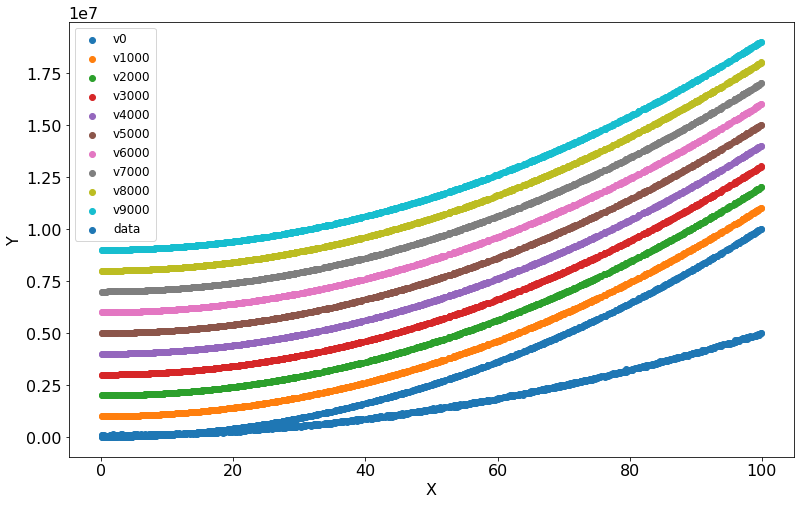

In [554]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,10000,1000):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i))
    plt.legend()

plt.scatter(x, y, label='data')
plt.legend()

plt.show()

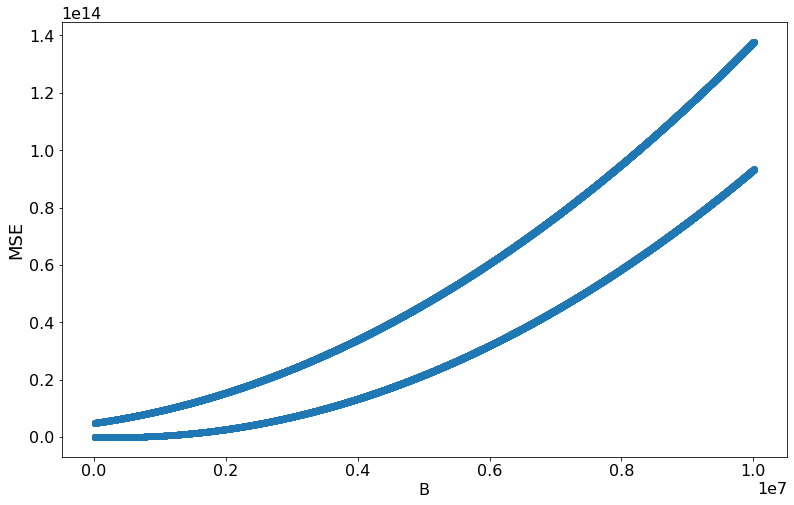

In [555]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('B', fontsize=16)

bias = []

mse = []


#update_outputs=[[20,10,0,[F(X;20,10,0)], 25000], [23,10,0, [F(X;23,10,0)], 24000], ...]



for update_output in update_outputs:
    
    bias.append(update_output[2])
    
    mse.append(update_output[4])
    
plt.scatter(bias, mse)




plt.show()

In [556]:
index_min = np.argmin(mse)# returns the index for the minimum value in the list
#mse=[25000,24000, ...., 700, 700, 800, ..., 10000000]
#       0     1          321  322, 323, ...,    999

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w2_opt = update_outputs[index_min][0]
w1_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]
print('Los valores optimos de los parámetros son W2 = {0:5.2f}  W1 = {1:5.2f}   b= {2:5.2f} ' \
      .format(w2_opt,w1_opt, b_opt))

El MSE mas pequeño tiene el valor: 57543976848.43
Los valores optimos de los parámetros son W2 = 1000.00  W1 = 400.00   b= 351000.00 


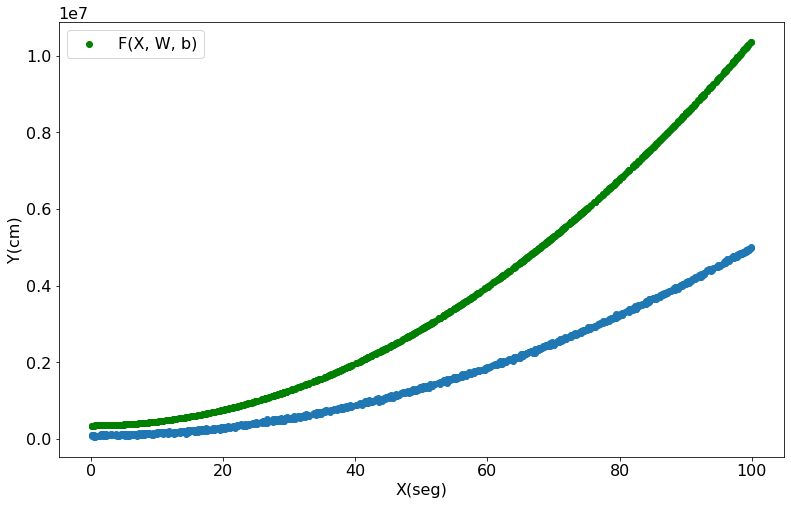

In [557]:
#Gráfica para los parámetros óptimos:

y_ = w2_opt*x**2 + w1_opt*x + b_opt

plot_x_y_y__(x,y,y_,points=True)